# Installing Tensorflow

In [1]:
!python --version

Python 3.8.8


In [2]:
#!pip install tensorflow

In [3]:
#!pip install tensorflow==2.0

In [4]:
#!pip install --ignore-installed --upgrade tensorflow==2.0

In [2]:
import tensorflow as tf
tf.__version__

'2.6.0'

# Keras Syntax Basics

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [4]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [5]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


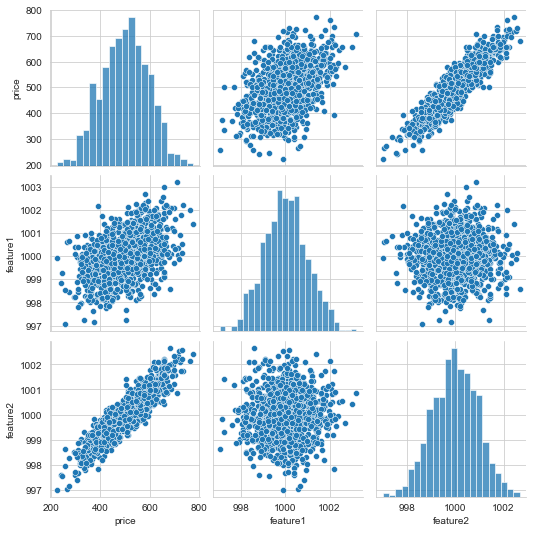

In [8]:
sns.pairplot(df);

In [9]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [12]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [13]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
X_train.shape

(700, 2)

In [16]:
X_test.shape

(300, 2)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [66]:
scaler = MinMaxScaler()

In [67]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
X_train.max()

1.0

In [57]:
X_train.min()

0.0

In [58]:
X_test.max()

1.0186515935232023

In [59]:
X_test.min()

-0.014108392024525074

## Modelling

In [60]:
import tensorflow as tf

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [27]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evaluation method (since it isn't yet buil

In [28]:
help(Dense)

Help on class Dense in module keras.layers.core:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-t

In [30]:
# First way to create model

model = Sequential([
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)
                    ])

In [91]:
# Second way to create model (recommended)

model = Sequential()
model.add(Dense(units = 4, activation = "relu"))     # input_dim = X_train.shape[1] or input_shape = X_train.shape
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [92]:
X_train.shape[1]

2

In [96]:
model.compile(optimizer = "rmsprop", loss = "mae")

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [97]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 0s 380us/step - loss: 497.7451
Epoch 2/250
22/22 [==============================] - 0s 380us/step - loss: 497.6125
Epoch 3/250
22/22 [==============================] - 0s 380us/step - loss: 497.4750
Epoch 4/250
22/22 [==============================] - 0s 380us/step - loss: 497.3221
Epoch 5/250
22/22 [==============================] - 0s 380us/step - loss: 497.1512
Epoch 6/250
22/22 [==============================] - 0s 380us/step - loss: 496.9609
Epoch 7/250
22/22 [==============================] - 0s 380us/step - loss: 496.7495
Epoch 8/250
22/22 [==============================] - 0s 380us/step - loss: 496.5164
Epoch 9/250
22/22 [==============================] - 0s 380us/step - loss: 496.2597
Epoch 10/250
22/22 [==============================] - 0s 380us/step - loss: 495.9774
Epoch 11/250
22/22 [==============================] - 0s 380us/step - loss: 495.6688
Epoch 12/250
22/22 [==============================] - 0s 380us/step - loss

In [98]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.weights

[<tf.Variable 'dense_24/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.34154344,  2.0151107 , -0.5606659 ,  1.8762228 ],
        [-0.20134187,  3.9738984 ,  0.20494348,  4.0310435 ]],
       dtype=float32)>,
 <tf.Variable 'dense_24/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.        ,  0.81719404, -0.10648527,  0.8218945 ], dtype=float32)>,
 <tf.Variable 'dense_25/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.6166534 ,  0.5591969 , -0.5592917 ,  0.29468244],
        [ 2.6316102 , -0.24507236,  3.248555  , -0.77876586],
        [ 0.4581679 ,  0.2843384 , -0.4918986 ,  0.7754681 ],
        [ 2.5167456 , -0.30432683,  2.9905226 ,  0.77563035]],
       dtype=float32)>,
 <tf.Variable 'dense_25/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.80752516,  0.        ,  0.80329424, -0.05732614], dtype=float32)>,
 <tf.Variable 'dense_26/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.8098179 ,  0.44870815,  2.0507755 ,  2.8233235 ],
        [ 0.16373569,  0.54

In [100]:
model.history.history

{'loss': [497.7450866699219,
  497.612548828125,
  497.47503662109375,
  497.3221435546875,
  497.1512451171875,
  496.9609069824219,
  496.7495422363281,
  496.5163879394531,
  496.2597351074219,
  495.9774169921875,
  495.66876220703125,
  495.3316650390625,
  494.9639587402344,
  494.5650329589844,
  494.13262939453125,
  493.6651306152344,
  493.1593322753906,
  492.614990234375,
  492.0291442871094,
  491.40106201171875,
  490.7274169921875,
  490.0066223144531,
  489.2361755371094,
  488.4131164550781,
  487.5376892089844,
  486.6050109863281,
  485.6166076660156,
  484.5661926269531,
  483.4513854980469,
  482.2699890136719,
  481.02093505859375,
  479.70513916015625,
  478.3127746582031,
  476.8450927734375,
  475.2969970703125,
  473.66754150390625,
  471.95562744140625,
  470.152587890625,
  468.2640075683594,
  466.2837829589844,
  464.1971740722656,
  461.88067626953125,
  459.4327087402344,
  456.846923828125,
  454.1310119628906,
  451.2740478515625,
  448.2673645019531,


In [101]:
pd.DataFrame(model.history.history)

,loss
0,497.745
1,497.613
2,497.475
3,497.322
4,497.151
...,...
245,3.936
246,3.990
247,3.953
248,3.968


<AxesSubplot:>

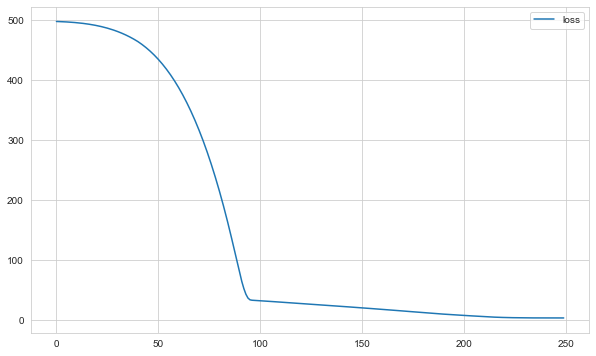

In [102]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

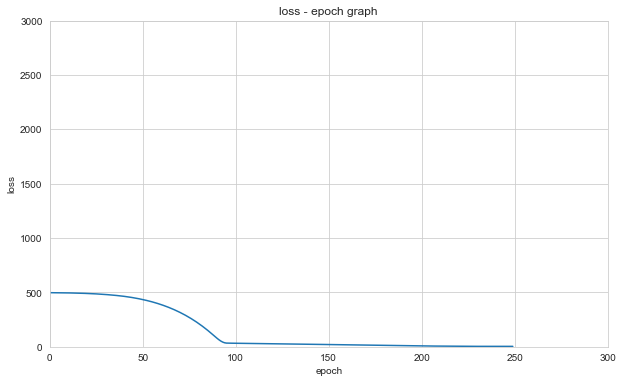

In [103]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 300]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [105]:
model.evaluate(X_train, y_train, verbose=0)

3.9307711124420166

In [106]:
model.evaluate(X_test, y_test, verbose=0)

4.178685665130615

In [107]:
y_pred = model.predict(X_test)

In [108]:
explained_variance_score(y_test, y_pred)

0.997113455736187

In [109]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
264,400.635,399.514
253,484.560,494.941
107,390.863,392.498
149,451.898,453.597
218,559.961,566.660
206,337.951,341.408
134,594.687,600.767
245,515.778,520.191
77,444.680,444.839
240,540.382,537.887


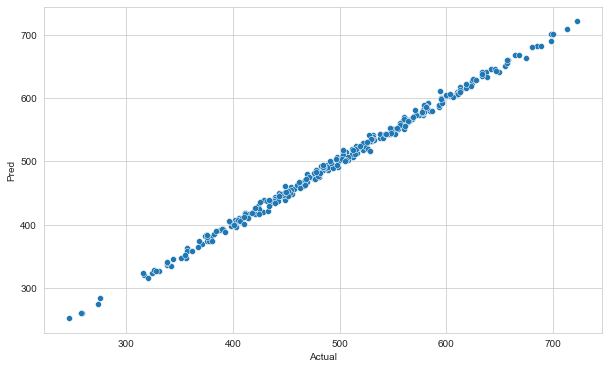

In [113]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare);

In [111]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [112]:
eval_metric(y_test, y_pred)

r2_score: 0.9969786604205139 
mae: 4.17868550024817 
mse: 26.563713254806967 
rmse: 5.1539997336832455


## Final Model and Model Deployment

In [114]:
scaler = MinMaxScaler().fit(X)

In [115]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [116]:
X_scaled = scaler.transform(X)

In [117]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mae")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 0s 386us/step - loss: 498.6501
Epoch 2/250
32/32 [==============================] - 0s 386us/step - loss: 498.5108
Epoch 3/250
32/32 [==============================] - 0s 386us/step - loss: 498.3779
Epoch 4/250
32/32 [==============================] - 0s 354us/step - loss: 498.1271
Epoch 5/250
32/32 [==============================] - 0s 386us/step - loss: 497.7698
Epoch 6/250
32/32 [==============================] - 0s 386us/step - loss: 497.2701
Epoch 7/250
32/32 [==============================] - 0s 386us/step - loss: 496.5597
Epoch 8/250
32/32 [==============================] - 0s 386us/step - loss: 495.7668
Epoch 9/250
32/32 [==============================] - 0s 386us/step - loss: 494.8585
Epoch 10/250
32/32 [==============================] - 0s 386us/step - loss: 493.7461
Epoch 11/250
32/32 [==============================] - 0s 418us/step - loss: 492.4215
Epoch 12/250
32/32 [==============================] - 0s 386us/step - loss

H5 is a file format to store structured data, it's not a model by itself. Keras saves models in this format as it can easily store the weights and model configuration in a single file.

In [118]:
model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

## Prediction-1

In [119]:
from tensorflow.keras.models import load_model

In [120]:
model_fake_reg = load_model('model_fake_reg.h5')

In [121]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

In [122]:
sample = [[998, 1000]]

In [123]:
sample_scaled = scaler_fake_reg.transform(sample)

In [124]:
model_fake_reg.predict(sample_scaled)

array([[419.51038]], dtype=float32)

## Prediction-2

In [125]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [126]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [127]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [128]:
model_fake_reg.predict(sample_scaled)

array([[380.46725],
       [332.52603],
       [284.58682],
       [236.64761],
       [188.7084 ]], dtype=float32)